<a href="https://colab.research.google.com/github/usseif97/MRNET-for-Knee-Diagnosis/blob/master/VGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Library Imports**

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as npl
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from keras.utils import np_utils
from keras.layers.normalization import BatchNormalization

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers import Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.initializers import glorot_normal
from keras.utils import np_utils




### **Import DataSet**

In [0]:
from keras.datasets import cifar10


## **Get DataSet**

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data() # x_train - training data(images), y_train - labels(digits)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170500096/170498071 [==============================] - 13s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples



##  Define Variables

In [0]:
num_classes = 10
BATCH_NORM = False


## **Preprocessing and split Data into test and validation**

In [0]:

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255
x_test /= 255

## **Define Model**

In [0]:
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:], name='block1_conv1'))
model.add(BatchNormalization()) if BATCH_NORM else None
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3), padding='same', name='block1_conv2'))
model.add(BatchNormalization()) if BATCH_NORM else None
model.add(Activation('relu'))

model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool'))

model.add(Conv2D(128, (3, 3), padding='same', name='block2_conv1'))
model.add(BatchNormalization()) if BATCH_NORM else None
model.add(Activation('relu'))

model.add(Conv2D(128, (3, 3), padding='same', name='block2_conv2'))
model.add(BatchNormalization()) if BATCH_NORM else None
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool'))

model.add(Conv2D(256, (3, 3), padding='same', name='block3_conv1'))
model.add(BatchNormalization()) if BATCH_NORM else None
model.add(Activation('relu'))

model.add(Conv2D(256, (3, 3), padding='same', name='block3_conv2'))
model.add(BatchNormalization()) if BATCH_NORM else None
model.add(Activation('relu'))

model.add(Conv2D(256, (3, 3), padding='same', name='block3_conv3'))
model.add(BatchNormalization()) if BATCH_NORM else None
model.add(Activation('relu'))

model.add(Conv2D(256, (3, 3), padding='same', name='block3_conv4'))
model.add(BatchNormalization()) if BATCH_NORM else None
model.add(Activation('relu'))

model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool'))

model.add(Conv2D(512, (3, 3), padding='same', name='block4_conv1'))
model.add(BatchNormalization()) if BATCH_NORM else None
model.add(Activation('relu'))

model.add(Conv2D(512, (3, 3), padding='same', name='block4_conv2'))
model.add(BatchNormalization()) if BATCH_NORM else None
model.add(Activation('relu'))

model.add(Conv2D(512, (3, 3), padding='same', name='block4_conv3'))
model.add(BatchNormalization()) if BATCH_NORM else None
model.add(Activation('relu'))

model.add(Conv2D(512, (3, 3), padding='same', name='block4_conv4'))
model.add(BatchNormalization()) if BATCH_NORM else None
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool'))

model.add(Conv2D(512, (3, 3), padding='same', name='block5_conv1'))
model.add(BatchNormalization()) if BATCH_NORM else None
model.add(Activation('relu'))

model.add(Conv2D(512, (3, 3), padding='same', name='block5_conv2'))
model.add(BatchNormalization()) if BATCH_NORM else None
model.add(Activation('relu'))

model.add(Conv2D(512, (3, 3), padding='same', name='block5_conv3'))
model.add(BatchNormalization()) if BATCH_NORM else None
model.add(Activation('relu'))

model.add(Conv2D(512, (3, 3), padding='same', name='block5_conv4'))
model.add(BatchNormalization()) if BATCH_NORM else None
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(4096))
model.add(BatchNormalization()) if BATCH_NORM else None
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(4096, name='fc2'))
model.add(BatchNormalization()) if BATCH_NORM else None
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(BatchNormalization()) if BATCH_NORM else None
model.add(Activation('softmax'))


In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
activation_3 (Activation)    (None, 16, 16, 128)      

## **Compile Model**

In [0]:
model.compile(loss="categorical_crossentropy",  # Because we have multiClasses and get the label Y in one hot
              optimizer="sgd", # Stochastic gradient descent
              metrics=["accuracy"])

## **Fit Model**

In [45]:
model_history= model.fit(x_train, y_train, batch_size=64, epochs=25, validation_data=(x_test,y_test))


Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 46s 921us/step - loss: 2.3027 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/25
50000/50000 [==============================] - 45s 908us/step - loss: 2.3027 - accuracy: 0.0983 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/25
50000/50000 [==============================] - 46s 912us/step - loss: 2.3027 - accuracy: 0.0998 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/25
50000/50000 [==============================] - 46s 913us/step - loss: 2.3027 - accuracy: 0.0991 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/25
50000/50000 [==============================] - 46s 912us/step - loss: 2.3027 - accuracy: 0.0978 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/25
50000/50000 [==============================] - 46s 912us/step - loss: 2.3027 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/25
50000/50000 [==============================] 

## **Plot Results**

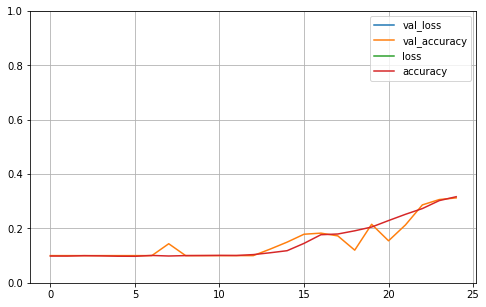

In [46]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()